# [Personal Project]
---
> ## * Subject: SALARY PREDICTION of Players who sign a FA Contract
>![](http://news.sportslogos.net/wp-content/uploads/2014/09/MLB.png)
>---
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)
>
>    * **Analysis : Regression**
>---
> ## * Composition of data
>    * Rows of Batter's Data : 671
>    * Columns of Batter's Data : 40
>---
>    * Rows of Pitcher's Data : 615
>    * Columns of Pitcher's Data : 41
>---
>    * Dependent Variable : Salary(Y)
>    * Independent Variables : All variables except Dependent Variable
>---
> ## * Process of Progress
>    * EDA(Exploratory data analysis)
>    * Feature selection
>    * Modeling(OLS Regression, from_formula)
>    * Cross Validation
>    * Check RMSLE and RMSE

---
** 'Import' all the necessary packages **

In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

# * Batters

In [265]:
bat_df = pd.read_csv('../dataset/merged_bat.csv')

In [266]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

In [267]:
print(bat_df.shape)
bat_df.tail(15)

(671, 40)


,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
656,Trevor Plouffe,2016,Twins,84,319,344,83,57,13,1,12,35,47,19,0,60,5.5,17.4,0.32,0.284,2,3,1,11,1,0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,1.0,5250000.0,5.250000e+06
657,Welington Castillo,2016,Diamondbacks,113,416,457,110,72,24,0,14,41,68,33,3,121,7.2,26.5,0.27,0.337,4,4,0,5,2,0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,2.0,13000000.0,6.500000e+06
658,Wilson Ramos,2016,Nationals,131,482,523,148,101,25,0,22,58,80,35,2,79,6.7,15.1,0.44,0.327,2,4,0,17,0,0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,2.0,12500000.0,6.250000e+06
659,Yoenis Cespedes,2016,Mets,132,479,543,134,77,25,1,31,72,86,51,8,108,9.4,19.9,0.47,0.298,7,6,0,14,3,1,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,4.0,110000000.0,2.750000e+07
660,Carlos Santana,2017,Indians,154,571,667,148,85,37,3,23,90,79,88,6,94,13.2,14.1,0.94,0.274,6,2,0,11,5,1,-7.3,0.196,0.350,16.5,0.259,0.363,0.455,0.818,3.0,117.0,0.56,3.0,60000000.0,2.000000e+07
661,Chris Iannetta,2017,Diamondbacks,89,272,316,69,33,19,0,17,38,43,37,0,87,11.7,27.5,0.43,0.308,6,1,0,3,0,0,5.4,0.257,0.367,12.3,0.254,0.354,0.511,0.865,2.2,120.0,1.32,2.0,8500000.0,4.250000e+06
662,Jay Bruce,2017,Indians,146,555,617,141,74,29,2,36,82,101,57,0,139,9.2,22.5,0.41,0.274,2,3,0,11,1,1,-5.6,0.254,0.350,15.1,0.254,0.324,0.508,0.832,2.7,118.0,2.14,3.0,39000000.0,1.300000e+07
663,Leonys Martin,2017,Cubs,49,128,138,22,15,3,1,3,14,9,8,1,33,5.8,23.9,0.24,0.207,2,0,0,2,7,4,2.1,0.109,0.224,-11.3,0.172,0.232,0.281,0.513,-0.4,35.0,-0.92,1.0,1750000.0,1.750000e+06
664,Matt Adams,2017,Braves,131,339,367,93,50,22,1,20,46,65,23,5,88,6.3,24.0,0.26,0.311,1,4,0,5,0,0,-2.3,0.248,0.346,7.8,0.274,0.319,0.522,0.841,1.6,112.0,0.68,1.0,4000000.0,4.000000e+06
665,Mitch Moreland,2017,Red Sox,149,508,576,125,69,34,0,22,73,79,57,6,120,9.9,20.8,0.48,0.278,6,5,0,14,0,1,-7.0,0.197,0.326,2.3,0.246,0.326,0.443,0.769,0.9,98.0,0.58,2.0,13000000.0,6.500000e+06


In [6]:
bat_yr = pd.DataFrame(bat_df['Yr'])

In [7]:
bat_df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB                int64
PA                int64
H                 int64
Hits              int64
Doubles           int64
Triples           int64
HR                int64
R                 int64
RBI               int64
BB                int64
IBB               int64
SO                int64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP           float64
HBP               int64
SF                int64
SH                int64
GDP               int64
SB                int64
CS                int64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
Contract_Yrs    float64
Total_Salary    float64
Salary          float64
dtype: object

In [8]:
## Checking the elementary statistic by variables

bat_df.describe()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,6.710000e+02,6.710000e+02
mean,2010.444113,108.529061,353.643815,396.570790,92.383010,61.333830,18.363636,1.532042,11.160954,46.143070,45.296572,34.344262,2.545455,70.463487,8.367809,18.721461,0.500507,0.290103,3.703428,2.925484,1.898659,8.235469,5.135618,1.967213,-1.046200,0.147027,0.315128,1.429657,0.252680,0.320663,0.399668,0.720343,1.158420,92.640835,0.021565,1.727273,1.447159e+07,4.910081e+06
std,3.427643,35.889324,158.118848,177.128625,46.936517,32.629243,10.297752,2.070064,9.352358,26.164299,27.386073,21.841268,3.469776,37.350076,3.367125,6.927909,0.240105,0.041907,3.652434,2.311643,2.834518,5.533183,8.250795,2.505301,8.910394,0.061374,0.048361,12.603257,0.040087,0.046510,0.081648,0.119791,1.571657,32.281283,1.472100,1.419003,3.329320e+07,5.330325e+06
min,2005.000000,24.000000,58.000000,71.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,4.500000,0.000000,0.103000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.800000,0.000000,0.060000,-32.100000,0.068000,0.068000,0.068000,0.136000,-2.300000,-81.000000,-3.470000,1.000000,4.000000e+05,4.000000e+05
25%,2008.000000,83.000000,219.000000,244.500000,53.000000,36.000000,11.000000,0.000000,4.000000,24.000000,22.000000,19.000000,0.000000,41.000000,6.000000,13.750000,0.330000,0.266000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,-6.350000,0.104000,0.293500,-7.300000,0.232000,0.298000,0.348000,0.658500,0.050000,77.000000,-0.940000,1.000000,1.250000e+06,1.250000e+06
50%,2010.000000,114.000000,353.000000,399.000000,89.000000,58.000000,17.000000,1.000000,9.000000,44.000000,42.000000,31.000000,2.000000,65.000000,8.100000,17.900000,0.470000,0.295000,3.000000,3.000000,1.000000,7.000000,2.000000,1.000000,-0.500000,0.145000,0.317000,-0.800000,0.256000,0.323000,0.404000,0.727000,0.800000,95.000000,-0.150000,1.000000,3.020000e+06,2.750000e+06
75%,2013.000000,138.500000,491.500000,554.500000,129.000000,85.000000,26.000000,2.000000,16.000000,66.000000,62.000000,47.000000,3.000000,92.000000,10.300000,23.200000,0.630000,0.316000,5.000000,4.000000,3.000000,11.500000,6.000000,3.000000,4.850000,0.190000,0.345000,7.800000,0.281000,0.351000,0.452000,0.796000,2.100000,112.000000,0.660000,2.000000,1.025000e+07,6.500000e+06
max,2017.000000,162.000000,661.000000,730.000000,212.000000,166.000000,52.000000,16.000000,47.000000,123.000000,129.000000,116.000000,38.000000,208.000000,22.400000,49.300000,1.590000,0.394000,26.000000,11.000000,20.000000,32.000000,60.000000,17.000000,31.700000,0.344000,0.439000,54.600000,0.346000,0.423000,0.627000,1.039000,6.800000,177.000000,7.630000,10.000000,2.750000e+08,3.441667e+07


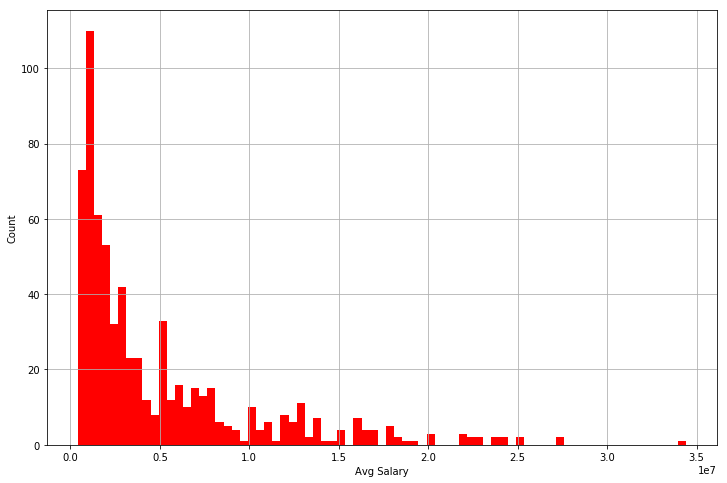

In [9]:
## Check distribution by Salaries

plt.figure(figsize=(12, 8))
plt.hist(bat_df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

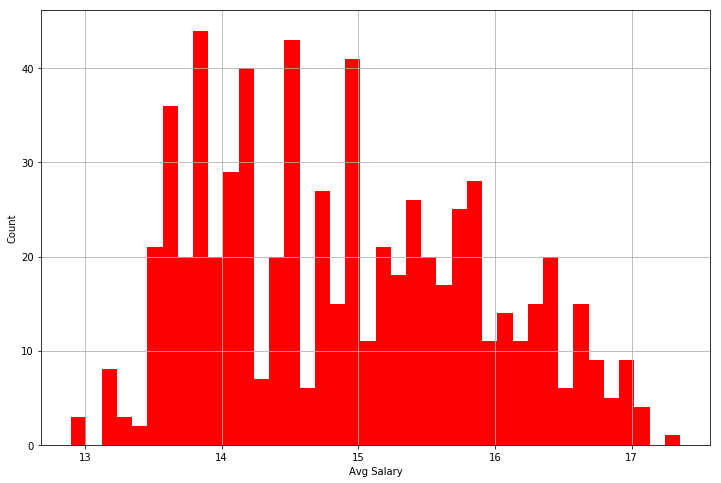

In [10]:
## Check distribution of Salaries graph when logarithm is applied

plt.figure(figsize=(12, 8))
plt.hist(np.log1p(bat_df['Salary']), bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

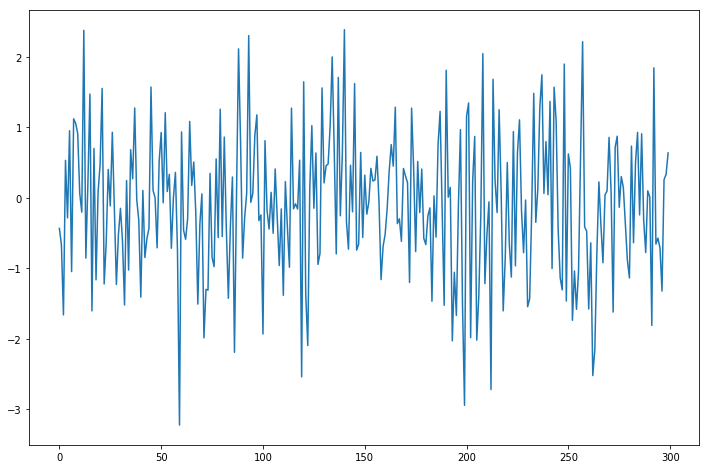

In [11]:
## Checking Gaussina white noise based on the year.

date = bat_df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

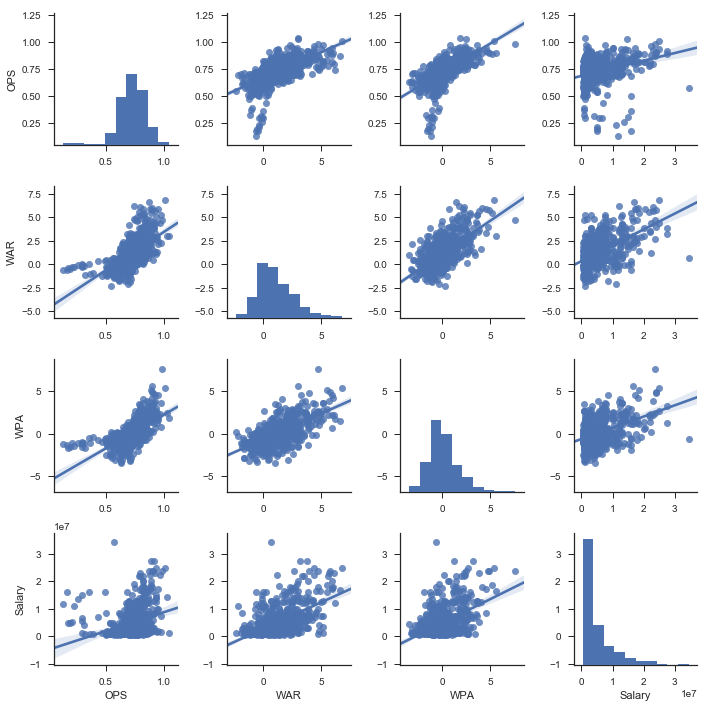

In [12]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(bat_df[cols], kind="reg")

In [13]:
bat_df.loc[7, 'Team'] = 'Rays'
bat_df.loc[34, 'Team'] = 'Rays'
bat_df.loc[56, 'Team'] = 'Rays'
bat_df.loc[125, 'Team'] = 'Rays'
bat_df.loc[150, 'Team'] = 'Rays'

# Reflect the rate of inflation year on year in US.
** * reference: http://www.multpl.com/inflation/table**

In [14]:
## Grasping the number of players who sign a FA contract by year

bat_df.groupby('Yr').count()['Name']

Yr
2005    59
2006    47
2007    50
2008    71
2009    62
2010    54
2011    59
2012    60
2013    53
2014    48
2015    54
2016    43
2017    11
Name: Name, dtype: int64

In [15]:
_2018 = bat_df.iloc[660:, :]
_2017 = bat_df.iloc[617:660, :]
_2016 = bat_df.iloc[563:617, :]
_2015 = bat_df.iloc[515:563, :]
_2014 = bat_df.iloc[462:515, :]
_2013 = bat_df.iloc[402:462, :]
_2012 = bat_df.iloc[343:402, :]
_2011 = bat_df.iloc[289:343, :]
_2010 = bat_df.iloc[227:289, :]
_2009 = bat_df.iloc[156:227, :]
_2008 = bat_df.iloc[106:156, :]
_2007 = bat_df.iloc[59:106, :]
_2006 = bat_df.iloc[:59, :]

In [16]:
_2018['SALARY'] = _2018.Salary * 1.0
_2017['SALARY'] = _2017.Salary * 1.0211
_2016['SALARY'] = _2016.Salary * 1.0211 * 1.0207
_2015['SALARY'] = _2015.Salary * 1.0211 * 1.0207 * 1.0173
_2014['SALARY'] = _2014.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176
_2013['SALARY'] = _2013.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015
_2012['SALARY'] = _2012.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174
_2011['SALARY'] = _2011.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296
_2010['SALARY'] = _2010.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015
_2009['SALARY'] = _2009.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272
_2008['SALARY'] = _2008.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009
_2007['SALARY'] = _2007.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408
_2006['SALARY'] = _2006.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408 * 1.0254

In [17]:
merge1 = pd.concat([_2006, _2007], axis=0)
merge2 = pd.concat([merge1, _2008], axis=0)
merge3 = pd.concat([merge2, _2009], axis=0)
merge4 = pd.concat([merge3, _2010], axis=0)
merge5 = pd.concat([merge4, _2011], axis=0)
merge6 = pd.concat([merge5, _2012], axis=0)
merge7 = pd.concat([merge6, _2013], axis=0)
merge8 = pd.concat([merge7, _2014], axis=0)
merge9 = pd.concat([merge8, _2015], axis=0)
merge10 = pd.concat([merge9, _2016], axis=0)
merge11 = pd.concat([merge10, _2017], axis=0)
bat_dF = pd.concat([merge11, _2018], axis=0)

In [18]:
bat_dF.tail(15)

,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary,SALARY
656,Trevor Plouffe,2016,Twins,84,319,344,83,57,13,1,12,35,47,19,0,60,5.5,17.4,0.32,0.284,2,3,1,11,1,0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,1.0,5250000.0,5.250000e+06,5.360775e+06
657,Welington Castillo,2016,Diamondbacks,113,416,457,110,72,24,0,14,41,68,33,3,121,7.2,26.5,0.27,0.337,4,4,0,5,2,0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,2.0,13000000.0,6.500000e+06,6.637150e+06
658,Wilson Ramos,2016,Nationals,131,482,523,148,101,25,0,22,58,80,35,2,79,6.7,15.1,0.44,0.327,2,4,0,17,0,0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,2.0,12500000.0,6.250000e+06,6.381875e+06
659,Yoenis Cespedes,2016,Mets,132,479,543,134,77,25,1,31,72,86,51,8,108,9.4,19.9,0.47,0.298,7,6,0,14,3,1,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,4.0,110000000.0,2.750000e+07,2.808025e+07
660,Carlos Santana,2017,Indians,154,571,667,148,85,37,3,23,90,79,88,6,94,13.2,14.1,0.94,0.274,6,2,0,11,5,1,-7.3,0.196,0.350,16.5,0.259,0.363,0.455,0.818,3.0,117.0,0.56,3.0,60000000.0,2.000000e+07,2.000000e+07
661,Chris Iannetta,2017,Diamondbacks,89,272,316,69,33,19,0,17,38,43,37,0,87,11.7,27.5,0.43,0.308,6,1,0,3,0,0,5.4,0.257,0.367,12.3,0.254,0.354,0.511,0.865,2.2,120.0,1.32,2.0,8500000.0,4.250000e+06,4.250000e+06
662,Jay Bruce,2017,Indians,146,555,617,141,74,29,2,36,82,101,57,0,139,9.2,22.5,0.41,0.274,2,3,0,11,1,1,-5.6,0.254,0.350,15.1,0.254,0.324,0.508,0.832,2.7,118.0,2.14,3.0,39000000.0,1.300000e+07,1.300000e+07
663,Leonys Martin,2017,Cubs,49,128,138,22,15,3,1,3,14,9,8,1,33,5.8,23.9,0.24,0.207,2,0,0,2,7,4,2.1,0.109,0.224,-11.3,0.172,0.232,0.281,0.513,-0.4,35.0,-0.92,1.0,1750000.0,1.750000e+06,1.750000e+06
664,Matt Adams,2017,Braves,131,339,367,93,50,22,1,20,46,65,23,5,88,6.3,24.0,0.26,0.311,1,4,0,5,0,0,-2.3,0.248,0.346,7.8,0.274,0.319,0.522,0.841,1.6,112.0,0.68,1.0,4000000.0,4.000000e+06,4.000000e+06
665,Mitch Moreland,2017,Red Sox,149,508,576,125,69,34,0,22,73,79,57,6,120,9.9,20.8,0.48,0.278,6,5,0,14,0,1,-7.0,0.197,0.326,2.3,0.246,0.326,0.443,0.769,0.9,98.0,0.58,2.0,13000000.0,6.500000e+06,6.500000e+06


In [19]:
bat_df2 = bat_dF.copy()

In [20]:
bat_df2 = pd.get_dummies(bat_dF.iloc[:, 2:], columns=['Team'])

In [21]:
idx_2017 = 660

In [22]:
def scaled(col):
    return (col - col[:idx_2017].mean()) / (col[:idx_2017].std())

In [23]:
for col in bat_df2.columns:
    if not ("Team_" in col):
        bat_df2[col] = np.log1p(np.vectorize(max)(0.0, bat_df2[col]))
        if col != "SALARY":
            bat_df2[col] = scaled(bat_df2[col])

In [24]:
bat_df2.tail()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary,SALARY,Team_Angels,Team_Astros,Team_Athletics,Team_Blue Jays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_Red Sox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_White Sox,Team_Yankees
666,0.003585,-0.129655,-0.238928,-0.141505,-0.437295,0.577149,-1.065946,0.181862,-0.433388,-0.025206,-0.990557,0.193408,0.508390,-1.367070,1.116765,-1.648359,0.411461,-1.605270,-0.124384,0.469256,-0.098204,-1.155895,-1.145663,0.813679,0.480764,-0.504687,-0.805535,-0.194999,-1.013796,0.260018,-0.189584,-0.567387,-0.074383,-0.649742,-0.613248,-0.360550,-0.162454,14.731802,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
667,-0.740782,-0.611999,-0.672587,-0.492297,-0.516351,-0.657239,-1.065946,0.284509,-0.646525,-0.025206,-0.805111,0.568456,0.256750,-0.572602,1.380862,-1.372936,0.802388,0.157751,-0.747586,-0.047191,-0.576371,-1.155895,-0.179229,1.338302,0.560670,-0.078493,-0.805535,0.000361,-0.309173,0.412798,0.167496,0.064149,0.132489,-0.649742,-0.613248,-0.281253,-0.049153,14.845130,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,-0.118090,0.172989,0.089927,0.319705,0.352751,-0.400170,-1.065946,0.980912,0.222623,0.505196,-0.251181,-1.238842,0.819793,-0.537110,1.106846,-1.213138,1.075326,-1.605270,-0.124384,-0.930061,0.544121,-1.155895,-1.145663,1.655912,1.017545,0.597257,0.857162,0.722006,0.067694,1.089184,0.757554,1.153411,0.423649,1.481712,0.490365,0.893157,0.935894,15.830414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
669,0.821513,0.664108,0.718974,0.646480,0.462415,0.517141,-1.065946,1.328532,0.891546,0.806752,1.172524,1.298022,1.158987,1.190198,0.677440,0.407388,0.295514,-0.208109,-1.812957,-0.930061,0.408674,-0.115423,-1.145663,-0.822114,1.433157,1.025458,1.617325,0.339256,0.927478,1.212322,1.149312,1.003692,0.632979,2.148631,0.490365,0.938315,1.000417,15.894952,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
670,0.456791,0.612714,0.670806,0.763850,0.564612,0.634707,2.119505,1.168687,1.035327,0.727447,1.054632,-1.238842,0.443276,1.027503,-0.320770,1.214969,0.526965,0.157751,0.660758,-0.930061,-0.317270,0.157034,-1.145663,1.448745,1.675179,1.522710,1.953035,1.076520,1.327643,1.728489,1.628927,2.009377,0.721896,1.873989,1.273391,1.543560,1.459839,16.354485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
bat_copy = bat_df2.copy()

for col in ["Contract_Yrs", "Total_Salary", "Salary", "SALARY"]:
    try:
        del bat_copy[col]
    
    except:
        pass

In [26]:
bat_copy.rename(columns={"Team_Red Sox" : "Team_RedSox", "Team_Blue Jays" : "Team_BlueJays",
                         "Team_White Sox" : "Team_WhiteSox"}, inplace=True)

In [27]:
bat_df = bat_copy.copy()
bat_df.tail()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
666,0.003585,-0.129655,-0.238928,-0.141505,-0.437295,0.577149,-1.065946,0.181862,-0.433388,-0.025206,-0.990557,0.193408,0.508390,-1.367070,1.116765,-1.648359,0.411461,-1.605270,-0.124384,0.469256,-0.098204,-1.155895,-1.145663,0.813679,0.480764,-0.504687,-0.805535,-0.194999,-1.013796,0.260018,-0.189584,-0.567387,-0.074383,-0.649742,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
667,-0.740782,-0.611999,-0.672587,-0.492297,-0.516351,-0.657239,-1.065946,0.284509,-0.646525,-0.025206,-0.805111,0.568456,0.256750,-0.572602,1.380862,-1.372936,0.802388,0.157751,-0.747586,-0.047191,-0.576371,-1.155895,-0.179229,1.338302,0.560670,-0.078493,-0.805535,0.000361,-0.309173,0.412798,0.167496,0.064149,0.132489,-0.649742,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,-0.118090,0.172989,0.089927,0.319705,0.352751,-0.400170,-1.065946,0.980912,0.222623,0.505196,-0.251181,-1.238842,0.819793,-0.537110,1.106846,-1.213138,1.075326,-1.605270,-0.124384,-0.930061,0.544121,-1.155895,-1.145663,1.655912,1.017545,0.597257,0.857162,0.722006,0.067694,1.089184,0.757554,1.153411,0.423649,1.481712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
669,0.821513,0.664108,0.718974,0.646480,0.462415,0.517141,-1.065946,1.328532,0.891546,0.806752,1.172524,1.298022,1.158987,1.190198,0.677440,0.407388,0.295514,-0.208109,-1.812957,-0.930061,0.408674,-0.115423,-1.145663,-0.822114,1.433157,1.025458,1.617325,0.339256,0.927478,1.212322,1.149312,1.003692,0.632979,2.148631,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
670,0.456791,0.612714,0.670806,0.763850,0.564612,0.634707,2.119505,1.168687,1.035327,0.727447,1.054632,-1.238842,0.443276,1.027503,-0.320770,1.214969,0.526965,0.157751,0.660758,-0.930061,-0.317270,0.157034,-1.145663,1.448745,1.675179,1.522710,1.953035,1.076520,1.327643,1.728489,1.628927,2.009377,0.721896,1.873989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## * Separate the TRAIN & TEST data and then, Divide the Dependent & Independent Variables.

In [28]:
bat_train = bat_df.iloc[:idx_2017, :]
bat_testX = bat_df.iloc[idx_2017:, :]

In [29]:
bat_train.tail()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
655,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
656,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
657,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
659,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
bat_testX.head()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
660,1.016584,1.078770,1.155935,0.954152,0.750246,1.225078,1.057688,1.124723,1.196283,1.019348,1.502372,1.298022,0.765477,1.207630,-0.547271,1.735744,-0.362131,0.869443,-0.124384,-0.930061,0.667775,0.541041,-0.179229,-0.822114,0.829838,0.714731,1.483048,0.170279,0.887139,0.691244,0.794998,1.291451,0.470480,0.297487,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
661,-0.299413,-0.223854,-0.164736,-0.162471,-0.643333,0.320081,-1.065946,0.814895,0.024764,0.237298,0.399486,-1.238842,0.631760,0.932254,1.194852,-0.238144,0.434597,0.869443,-0.747586,-0.930061,-0.893485,-1.155895,-1.145663,1.041649,1.765140,1.044758,1.263611,0.049006,0.704881,1.323486,1.142024,0.896348,0.504573,1.142887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
662,0.888299,1.028806,1.018090,0.883028,0.544721,0.891776,0.616994,1.590908,1.069052,1.337154,0.947471,-1.238842,1.442911,0.391529,0.665795,-0.329293,-0.362131,-0.208109,0.317785,-0.930061,0.667775,-0.499430,-0.179229,-0.822114,1.720213,0.714731,1.416377,0.049006,0.088481,1.290214,0.899297,1.153411,0.481939,1.787576,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
663,-1.722341,-1.544075,-1.625451,-1.807585,-1.775290,-1.949185,-0.004129,-0.804964,-1.296376,-1.700836,-1.467096,-0.335193,-1.029613,-0.608612,0.824501,-1.160737,-1.996370,-0.208109,-1.812957,-0.930061,-1.302316,0.813499,1.098328,0.313838,-0.590151,-1.869277,-0.805535,-2.011990,-1.892811,-1.440989,-1.701812,-1.163152,-1.141643,-0.649742,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
664,0.627744,0.162660,0.099582,0.273269,-0.034437,0.517141,-0.004129,0.980912,0.282747,0.767700,-0.196028,1.097057,0.651501,-0.433599,0.835494,-1.057191,0.503899,-0.723760,0.660758,-0.930061,-0.317270,-1.155895,-1.145663,-0.822114,1.630036,0.636473,0.933371,0.531232,-0.015609,1.444919,0.965926,0.528697,0.411684,0.455345,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
bat_trainY = pd.DataFrame(bat_df2['SALARY'])
bat_trainY = bat_trainY.iloc[:idx_2017, :]

In [32]:
bat_trainY.tail()

,SALARY
655,15.089154
656,15.494619
657,15.708193
658,15.668973
659,17.150577


In [33]:
bat_testY = pd.DataFrame(bat_df2['SALARY'])
bat_testY = bat_testY.iloc[idx_2017:, :]

In [34]:
bat_testY.head()

,SALARY
660,16.811243
661,15.262430
662,16.380460
663,14.375127
664,15.201805


In [35]:
to_list = bat_train.columns.tolist()
salary_str = "SALARY ~ "

join_list = " + ".join(to_list)
ff_list = salary_str + join_list
ff_list

'SALARY ~ G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves + Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners + Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers + Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [36]:
bat_trainX = pd.concat([bat_train, bat_trainY], axis=1)
print(bat_trainX.shape)
bat_trainX.tail()

(660, 65)


,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees,SALARY
655,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.089154
656,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.494619
657,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.708193
658,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.668973
659,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.150577


In [37]:
dma = dmatrix(join_list, bat_trainX)
dma_columns = dma.design_info.column_names
dfX = pd.DataFrame(dma, columns=dma_columns)
dfX.tail()

,Intercept,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
655,1.0,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
656,1.0,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
657,1.0,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,1.0,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,1.0,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
model_dma = sm.OLS(bat_trainY, dfX)
result_dma = model_dma.fit()
print(result_dma.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     12.85
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.69e-76
Time:                        12:25:16   Log-Likelihood:                -648.88
No. Observations:                 660   AIC:                             1426.
Df Residuals:                     596   BIC:                             1713.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.5245      0.02

### * OLS analysis

In [39]:
model0 = sm.OLS.from_formula(ff_list, bat_trainX)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     12.85
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.69e-76
Time:                        12:25:16   Log-Likelihood:                -648.88
No. Observations:                 660   AIC:                             1426.
Df Residuals:                     596   BIC:                             1713.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.5245      0.02

## * Eliminating Outliers above ANALYSIS

In [40]:
def elim_outliers(result, dfX, dfY):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [41]:
idx1_num = elim_outliers(result_dma, dfX, bat_trainY)

print(idx1_num, '\n')
print("Outliers: {}".format(len(idx1_num)))

[  3   5  27  31  33  42  65  70  74  86 120 138 142 164 166 199 204 211
 214 223 258 261 266 294 306 313 356 435 462 465 512 522 541 562 604 609
 616] 

Outliers: 37


In [42]:
bat_dfX1 = bat_train.drop(idx1_num)
bat_dfY1 = bat_trainY.drop(idx1_num)

In [43]:
bat_dfX1.shape, bat_dfY1.shape

((623, 64), (623, 1))

In [44]:
team_list = []
num_list = []

for col1 in bat_trainX.columns:
    if "Team_" in col1:
        cols = "C(" + col1 + ")"
        team_list.append(cols)
        
for col2 in bat_trainX.columns:
    if not (("Team_" in col2) or ("SALARY" in col2)):
        num_list.append(col2)
        
print("The number of team_list: ", len(team_list), ',', " The number of num_list: ", len(num_list), '\n\n')
print(team_list, '\n\n', num_list, '\n')
print("-" * 100, '\n\n')

str_list = num_list + team_list
print("The number of str_list: ", len(str_list), '\n\n')
print(str_list)

The number of team_list:  30 ,  The number of num_list:  34 


['C(Team_Angels)', 'C(Team_Astros)', 'C(Team_Athletics)', 'C(Team_BlueJays)', 'C(Team_Braves)', 'C(Team_Brewers)', 'C(Team_Cardinals)', 'C(Team_Cubs)', 'C(Team_Diamondbacks)', 'C(Team_Dodgers)', 'C(Team_Giants)', 'C(Team_Indians)', 'C(Team_Mariners)', 'C(Team_Marlins)', 'C(Team_Mets)', 'C(Team_Nationals)', 'C(Team_Orioles)', 'C(Team_Padres)', 'C(Team_Phillies)', 'C(Team_Pirates)', 'C(Team_Rangers)', 'C(Team_Rays)', 'C(Team_RedSox)', 'C(Team_Reds)', 'C(Team_Rockies)', 'C(Team_Royals)', 'C(Team_Tigers)', 'C(Team_Twins)', 'C(Team_WhiteSox)', 'C(Team_Yankees)'] 

 ['G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K', 'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA'] 

---------------------------------------------------------------------------------------------------- 


The 

In [45]:
str_list_ = " + ".join(str_list)
str_list_ = salary_str + str_list_

In [46]:
str_list_

'SALARY ~ G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + C(Team_Angels) + C(Team_Astros) + C(Team_Athletics) + C(Team_BlueJays) + C(Team_Braves) + C(Team_Brewers) + C(Team_Cardinals) + C(Team_Cubs) + C(Team_Diamondbacks) + C(Team_Dodgers) + C(Team_Giants) + C(Team_Indians) + C(Team_Mariners) + C(Team_Marlins) + C(Team_Mets) + C(Team_Nationals) + C(Team_Orioles) + C(Team_Padres) + C(Team_Phillies) + C(Team_Pirates) + C(Team_Rangers) + C(Team_Rays) + C(Team_RedSox) + C(Team_Reds) + C(Team_Rockies) + C(Team_Royals) + C(Team_Tigers) + C(Team_Twins) + C(Team_WhiteSox) + C(Team_Yankees)'

### * OLS analysis 2

In [48]:
model0_1 = sm.OLS.from_formula(str_list_, bat_trainX)
result0_1 = model0_1.fit()
print(result0_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     12.85
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.69e-76
Time:                        12:25:37   Log-Likelihood:                -648.88
No. Observations:                 660   AIC:                             1426.
Df Residuals:                     596   BIC:                             1713.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### * 1st OLS analysis

In [49]:
model1 = sm.OLS(bat_trainY, bat_train)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     12.85
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.69e-76
Time:                        12:25:41   Log-Likelihood:                -648.88
No. Observations:                 660   AIC:                             1426.
Df Residuals:                     596   BIC:                             1713.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
G                    -0.4816      0.08

In [51]:
len(bat_train.columns)

64

## * Eliminating Outliers above ANALYSIS

In [52]:
def elim_outliers(result, dfX, dfY):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [53]:
idx1_num = elim_outliers(result1, bat_train, bat_trainY)

print(idx1_num, '\n')
print("Outliers: {}".format(len(idx1_num)))

[  3   5  27  31  33  42  65  70  74  86 120 138 142 150 164 166 199 204
 211 214 223 258 261 266 294 306 313 356 435 462 465 512 522 541 562 604
 609 616 640] 

Outliers: 39


In [54]:
bat_dfX1 = bat_train.drop(idx1_num)
bat_dfY1 = bat_trainY.drop(idx1_num)

In [55]:
bat_dfX1.shape, bat_dfY1.shape

((621, 64), (621, 1))

### 2nd OLS analysis

In [56]:
model2 = sm.OLS(bat_dfY1, bat_dfX1)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     17.55
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           2.86e-96
Time:                        12:25:44   Log-Likelihood:                -524.24
No. Observations:                 621   AIC:                             1176.
Df Residuals:                     557   BIC:                             1460.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
G                    -0.4517      0.08

## * Filtrating P-VALUE above OLS model

In [57]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [58]:
pvals = extracted_pvals(result2, 0.05)

extracted_feature = pvals.index.values
bat_dfX2_1 = bat_dfX1.loc[:, extracted_feature]

### * 2-1 OLS analysis

In [59]:
model2_1 = sm.OLS(bat_dfY1, bat_dfX2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     25.69
Date:                Mon, 29 Jan 2018   Prob (F-statistic):          8.12e-103
Time:                        12:25:45   Log-Likelihood:                -547.31
No. Observations:                 621   AIC:                             1177.
Df Residuals:                     580   BIC:                             1358.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Team_Dodgers         15.1010      0.10

## * Filtrating P-VALUE above OLS model

In [60]:
bat_trainY.tail()

,SALARY
655,15.089154
656,15.494619
657,15.708193
658,15.668973
659,17.150577


In [61]:
pvals2_1 = extracted_pvals(result2_1, 0.05)

extracted_feature2_1 = pvals2_1.index.values
bat_dfX2_2 = bat_dfX2_1.loc[:, extracted_feature2_1]

### * 2-2 OLS anlaysis

In [62]:
model2_2 = sm.OLS(bat_dfY1, bat_dfX2_2)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     27.63
Date:                Mon, 29 Jan 2018   Prob (F-statistic):          3.49e-104
Time:                        12:25:47   Log-Likelihood:                -549.33
No. Observations:                 621   AIC:                             1175.
Df Residuals:                     583   BIC:                             1343.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Team_Dodgers         15.1060      0.10

In [63]:
bat_dfX2_2.shape, bat_dfY1.shape

((621, 38), (621, 1))

## * Checking SCORE and RMSE for the selected model

In [64]:
np.exp(bat_dfY1).mean()

SALARY    5.429025e+06
dtype: float64

In [65]:
5.429025 * (10**6)

5429025.0

In [66]:
(np.exp(result2_2.predict(bat_dfX2_2))).mean()

4568300.181286046

In [67]:
(np.exp(bat_dfY1).mean()) - ((np.exp(result2_2.predict(bat_dfX2_2))).mean())

SALARY    860724.780893
dtype: float64

In [68]:
bat_testX.shape

(11, 64)

In [69]:
bat_testX_copy = bat_testX.copy()

for col in bat_testX_copy.columns:
    if not col in bat_dfX2_2.columns:
        del bat_testX_copy[col]

print(len(bat_testX_copy.columns.tolist()))
print(bat_testX_copy.columns.tolist())

38
['G', 'AB', 'BB', 'BB_Percent', 'SH', 'wOBA', 'wRAA', 'WAR', 'Team_Angels', 'Team_Astros', 'Team_Athletics', 'Team_BlueJays', 'Team_Braves', 'Team_Brewers', 'Team_Cardinals', 'Team_Cubs', 'Team_Diamondbacks', 'Team_Dodgers', 'Team_Giants', 'Team_Indians', 'Team_Mariners', 'Team_Marlins', 'Team_Mets', 'Team_Nationals', 'Team_Orioles', 'Team_Padres', 'Team_Phillies', 'Team_Pirates', 'Team_Rangers', 'Team_Rays', 'Team_RedSox', 'Team_Reds', 'Team_Rockies', 'Team_Royals', 'Team_Tigers', 'Team_Twins', 'Team_WhiteSox', 'Team_Yankees']


In [70]:
to_list = bat_dfX2_2.columns.tolist()
bat_testX_copy = bat_testX_copy[to_list]
bat_testX_copy.tail()

,Team_Dodgers,Team_Diamondbacks,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Yankees,Team_Rangers,Team_Twins,Team_Tigers,Team_WhiteSox,Team_Rockies,Team_Indians,Team_Mariners,Team_Royals,Team_Nationals,Team_Orioles,Team_Padres,Team_Mets,Team_Giants,Team_Pirates,Team_Rays,Team_RedSox,Team_Reds,Team_Phillies,Team_Marlins,WAR,BB_Percent,BB,G,SH,wRAA,AB,wOBA
666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.567387,-1.367070,-0.990557,0.003585,0.469256,-0.805535,-0.129655,-0.504687
667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.064149,-0.572602,-0.805111,-0.740782,-0.047191,-0.805535,-0.611999,-0.078493
668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.153411,-0.537110,-0.251181,-0.118090,-0.930061,0.857162,0.172989,0.597257
669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.003692,1.190198,1.172524,0.821513,-0.930061,1.617325,0.664108,1.025458
670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.009377,1.027503,1.054632,0.456791,-0.930061,1.953035,0.612714,1.522710


In [71]:
(np.exp(result2_2.predict(bat_testX_copy))).mean()

5820630.322511151

In [72]:
np.exp(bat_testY).mean()

SALARY    7.542425e+06
dtype: float64

In [73]:
(np.exp(bat_testY).mean()) - ((np.exp(result2_2.predict(bat_testX_copy))).mean())

SALARY    1.721795e+06
dtype: float64

In [74]:
1.721795 * (10**6)

1721795.0

In [264]:
print("RMSLE: ", np.sqrt(mean_squared_error(bat_testY, result2_2.predict(bat_testX_copy))))

RMSLE:  0.319134286675


In [76]:
np.exp(-0.32), np.exp(0.32)

(0.72614903707369094, 1.3771277643359572)

#### * Check the TARGET VALUE

In [77]:
np.log(1.2)

0.18232155679395459

In [78]:
np.log(0.8)

-0.22314355131420971

## * train_test_split

In [79]:
XB = bat_dfX2_2.values
yB = bat_dfY1.values

In [80]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, shuffle=True, random_state=0)

In [81]:
print("※shape of train data: ", X_trainB.shape, y_trainB.shape, '\n')
print("※shape of test data: ", X_testB.shape, y_testB.shape)

※shape of train data:  (496, 38) (496, 1) 

※shape of test data:  (125, 38) (125, 1)


In [82]:
np.exp(result2_2.predict(X_trainB))

array([ 20306327.2527677 ,   4689796.02084166,   4557268.02260549,
         6629918.37953519,   2147952.88950033,   3483040.53000777,
         3206136.13410944,   1262911.4224387 ,   1369568.34118386,
         4707273.90769403,   4195703.12336289,   2448258.05100569,
        12151572.37897239,   3656048.95210001,    823993.07464035,
         3070966.44888595,   2133434.35167231,    912597.6700572 ,
        10529327.27966092,   1742737.68162418,   1662081.68292938,
         2000501.26372769,   2362824.58561527,   8639460.34948937,
         4266133.80556672,   4431976.66765189,   1308538.07252163,
          743952.67517019,  17917095.48952985,   3235743.67460696,
         1256954.89489108,   9063147.41896887,   1540998.15522046,
         2964174.06108031,   4524705.463718  ,   4530048.51693452,
         2626025.28615322,   4880386.16018843,   3859889.48067031,
         1420288.04505423,   2294049.61397243,   3743360.19207875,
         2022227.75111388,   4495112.81849664,   1378501.24410

In [83]:
result2_2.predict(X_trainB).mean()

15.056849375674123

In [84]:
result2_2.predict(X_testB).mean()

14.904161006078615

In [85]:
y_trueB = np.exp(y_testB)

In [86]:
bat_testX_copy.shape

(11, 38)

In [87]:
y_predB = np.exp(result2_2.predict(bat_testX_copy))

In [88]:
trainY = np.exp(bat_testY)

In [89]:
pred_ = np.exp(result2_2.predict(X_trainB))

In [90]:
print("RMSE of train: ", np.sqrt(mean_squared_error(trainY, y_predB)))

RMSE of train:  3413782.03557


# * Pitchers

In [268]:
pit_df = pd.read_csv('../dataset/merged_pit.csv')

In [269]:
pit_df.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)

In [270]:
print(pit_df.shape)
pit_df.tail(30)

(615, 41)


,Name,Yr,Team,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary
585,Shawn Tolleson,2016,Rangers,2,2,37,0,0,36.1,53,8,10,29,32,11,4,0,31,0,1,2,0,168,1,1.98,2.48,7.18,2.90,11.3,52.0,24.2,59.9,7.68,0.372,5.24,1.73,-1.61,-0.3,1.0,1000000.0,1.000000e+06
586,Travis Wood,2016,Cubs,4,0,77,0,0,61.0,45,8,24,47,24,0,1,0,20,1,12,2,0,252,0,1.18,3.54,6.93,1.96,9.1,37.4,11.0,78.2,2.95,0.215,4.54,1.13,1.28,0.1,2.0,12000000.0,6.000000e+06
587,Trevor Cahill,2016,Cubs,4,4,50,1,0,65.2,49,7,35,66,22,0,1,0,20,5,4,3,0,284,3,0.96,4.80,9.05,1.89,10.9,56.6,18.4,84.6,2.74,0.246,4.35,1.28,-0.26,0.0,1.0,1750000.0,1.750000e+06
588,Tyson Ross,2016,Padres,0,1,1,1,0,5.1,9,0,1,5,8,0,0,0,7,2,0,0,0,27,1,0.00,1.69,8.44,5.00,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,-0.24,0.1,1.0,6000000.0,6.000000e+06
589,Anthony Swarzak,2017,Brewers,6,4,70,0,0,77.1,58,6,22,91,21,2,3,0,20,2,27,4,0,303,2,0.70,2.56,10.59,4.14,22.8,43.9,7.9,82.9,2.33,0.286,2.74,1.03,2.54,2.2,2.0,14000000.0,7.000000e+06
590,Boone Logan,2017,Indians,1,0,38,0,0,21.0,20,2,9,28,13,0,1,0,11,1,4,0,0,91,0,0.86,3.86,12.00,3.11,20.9,50.0,14.3,62.5,4.71,0.353,3.16,1.38,0.45,0.3,1.0,2500000.0,2.500000e+06
591,Brandon Kintzler,2017,Nationals,4,3,72,0,0,71.1,66,5,16,39,25,29,6,0,24,3,10,2,0,288,1,0.63,2.02,4.92,2.44,8.0,54.9,8.3,76.9,3.03,0.271,3.77,1.15,1.88,0.9,2.0,10000000.0,5.000000e+06
592,Brandon Morrow,2017,Dodgers,6,0,45,0,0,43.2,31,0,9,50,10,2,1,0,10,1,10,1,0,170,2,0.00,1.85,10.31,5.56,24.1,45.0,0.0,75.6,2.06,0.282,1.55,0.92,1.34,1.7,2.0,21000000.0,1.050000e+07
593,Bryan Shaw,2017,Indians,4,6,79,0,0,76.2,71,5,22,73,36,3,3,0,30,0,26,3,0,312,3,0.59,2.58,8.57,3.32,16.4,55.9,10.6,66.3,3.52,0.311,2.96,1.21,0.65,1.6,3.0,27000000.0,9.000000e+06
594,Craig Stammen,2017,Padres,2,3,60,0,0,80.1,68,12,28,74,29,0,2,0,28,2,11,3,0,329,2,1.34,3.14,8.29,2.64,14.0,51.6,17.4,85.0,3.14,0.263,4.38,1.20,1.24,0.0,2.0,4500000.0,2.250000e+06


In [182]:
pit_yr = pd.DataFrame(pit_df['Yr'])

In [183]:
pit_df.dtypes

Name             object
Yr                int64
Team             object
W                 int64
L                 int64
G                 int64
GS                int64
CG                int64
IP              float64
H                 int64
HR                int64
BB                int64
SO                int64
R                 int64
SV                int64
BS                int64
BK                int64
ER                int64
HBP               int64
HLD               int64
IBB               int64
ShO               int64
TBF               int64
WP                int64
HR_per_9        float64
BB_per_9        float64
K_per_9         float64
K_per_BB        float64
K_BB_Percent    float64
GB_Percent      float64
HR_per_FB       float64
LOB_Percent     float64
ERA             float64
BABIP           float64
FIP             float64
WHIP            float64
WPA             float64
WAR             float64
Contract_Yrs    float64
Total_Salary    float64
Salary          float64
dtype: object

In [184]:
## Checking the elementary statistic by variables

pit_df.describe()

,Yr,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,6.150000e+02,6.150000e+02
mean,2011.159350,5.217886,5.196748,43.128455,9.674797,0.245528,89.507317,89.572358,10.024390,29.643902,70.704065,43.891057,4.045528,1.627642,0.297561,40.437398,3.160976,5.463415,2.422764,0.117073,382.721951,2.982114,0.992862,3.185870,7.433431,2.672016,11.255772,44.213659,10.406829,73.505041,4.055577,0.294377,4.065301,1.339512,0.093772,0.911870,1.619512,1.207998e+07,4.969781e+06
std,3.639805,4.268055,4.095201,20.532046,12.850998,0.694235,59.181606,63.388499,7.931161,19.251423,45.075907,32.067460,9.710024,2.227212,0.653911,29.624065,2.916611,7.527466,2.060202,0.381943,251.116165,2.675380,0.483337,1.222725,2.076764,1.384156,6.314445,8.547713,4.673676,8.092764,1.531673,0.037590,0.973210,0.246546,1.410262,1.215671,1.098538,2.434580e+07,4.804240e+06
min,2005.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.100000,5.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,1.260000,0.640000,-6.800000,18.600000,0.000000,33.300000,0.660000,0.136000,1.420000,0.640000,-3.680000,-1.100000,1.000000,3.800000e+05,3.800000e+05
25%,2008.000000,2.000000,2.000000,29.000000,0.000000,0.000000,49.100000,45.000000,4.000000,15.000000,40.000000,20.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,210.500000,1.000000,0.675000,2.380000,5.975000,1.800000,7.000000,38.900000,7.700000,68.700000,3.100000,0.272000,3.495000,1.195000,-0.795000,0.100000,1.000000,1.500000e+06,1.500000e+06
50%,2012.000000,4.000000,4.000000,39.000000,0.000000,0.000000,66.200000,62.000000,7.000000,24.000000,59.000000,30.000000,0.000000,0.000000,0.000000,28.000000,2.000000,1.000000,2.000000,0.000000,281.000000,2.000000,0.980000,3.020000,7.130000,2.330000,10.600000,43.800000,10.000000,73.400000,3.910000,0.294000,4.050000,1.320000,0.000000,0.600000,1.000000,4.000000e+06,3.500000e+06
75%,2014.000000,8.000000,8.000000,62.000000,22.000000,0.000000,131.150000,139.500000,15.500000,40.000000,92.500000,71.000000,1.000000,3.000000,0.000000,66.000000,4.500000,9.000000,4.000000,0.000000,577.500000,5.000000,1.250000,3.845000,8.585000,3.245000,14.600000,49.700000,12.750000,78.450000,4.735000,0.316000,4.570000,1.460000,0.905000,1.400000,2.000000,1.200000e+07,6.500000e+06
max,2017.000000,19.000000,18.000000,88.000000,35.000000,6.000000,241.000000,246.000000,38.000000,108.000000,252.000000,133.000000,48.000000,11.000000,5.000000,126.000000,18.000000,37.000000,13.000000,3.000000,975.000000,16.000000,4.150000,9.900000,14.870000,14.330000,37.100000,68.200000,34.000000,100.000000,18.690000,0.474000,10.170000,3.120000,6.790000,6.500000,7.000000,2.170000e+08,3.441667e+07


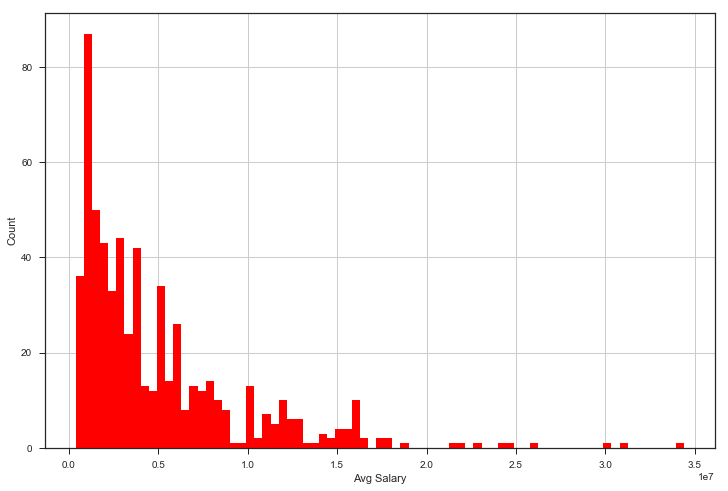

In [185]:
## Check distribution by Salaries

plt.figure(figsize=(12, 8))
plt.hist(pit_df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

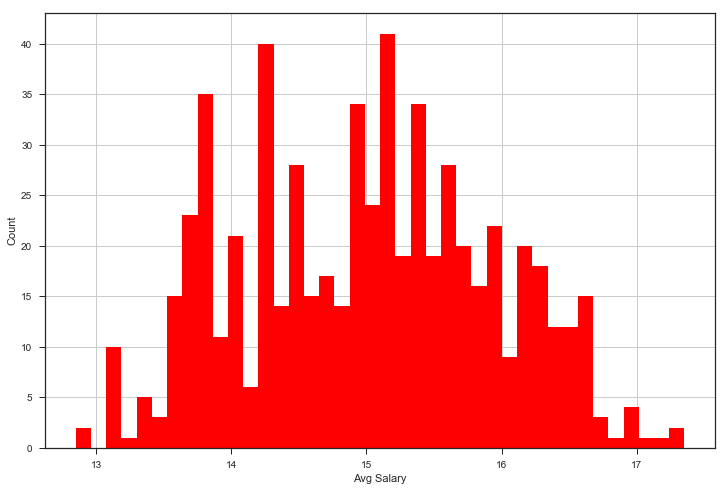

In [186]:

## Check distribution of Salaries graph when logarithm is applied

plt.figure(figsize=(12, 8))
plt.hist(np.log1p(pit_df['Salary']), bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

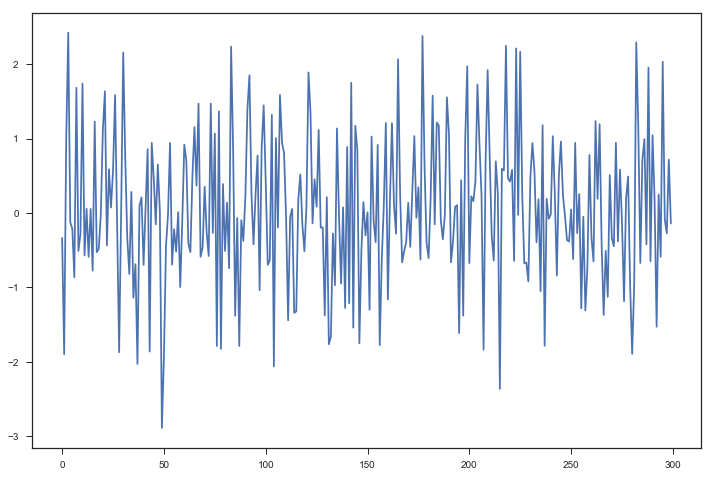

In [187]:
## Checking Gaussina white noise based on the year.

date = pit_df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

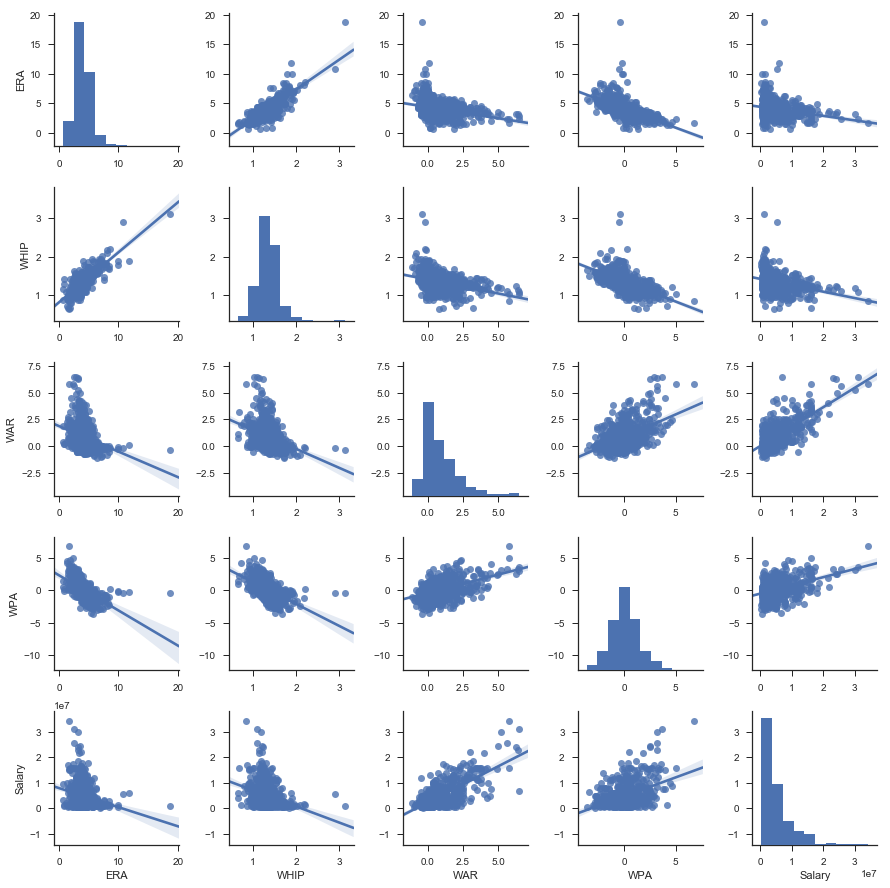

In [188]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["ERA", "WHIP", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(pit_df[cols], kind="reg")

In [191]:
pit_df.loc[8, 'Team'] = 'Rays'
pit_df.loc[21, 'Team'] = 'Rays'

## Reflect the rate of inflation year on year in US.

In [193]:
## Grasping the number of players who sign a FA contract by year

pit_df.groupby('Yr').count()['Name']

Yr
2005    53
2006    37
2007    44
2008    39
2009    49
2010    37
2011    30
2012    59
2013    68
2014    60
2015    67
2016    46
2017    26
Name: Name, dtype: int64

In [194]:
_2018P = pit_df.iloc[589:, :]
_2017P = pit_df.iloc[543:589, :]
_2016P = pit_df.iloc[476:543, :]
_2015P = pit_df.iloc[416:476, :]
_2014P = pit_df.iloc[348:416, :]
_2013P = pit_df.iloc[289:348, :]
_2012P = pit_df.iloc[259:289, :]
_2011P = pit_df.iloc[222:259, :]
_2010P = pit_df.iloc[173:222, :]
_2009P = pit_df.iloc[134:173, :]
_2008P = pit_df.iloc[90:134, :]
_2007P = pit_df.iloc[53:90, :]
_2006P = pit_df.iloc[:53, :]

In [195]:
_2018P['SALARY'] = _2018P.Salary * 1.0
_2017P['SALARY'] = _2017P.Salary * 1.0211
_2016P['SALARY'] = _2016P.Salary * 1.0211 * 1.0207
_2015P['SALARY'] = _2015P.Salary * 1.0211 * 1.0207 * 1.0173
_2014P['SALARY'] = _2014P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176
_2013P['SALARY'] = _2013P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015
_2012P['SALARY'] = _2012P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174
_2011P['SALARY'] = _2011P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296
_2010P['SALARY'] = _2010P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015
_2009P['SALARY'] = _2009P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272
_2008P['SALARY'] = _2008P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009
_2007P['SALARY'] = _2007P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408
_2006P['SALARY'] = _2006P.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408 * 1.0254

In [196]:
mergeP1 = pd.concat([_2006P, _2007P], axis=0)
mergeP2 = pd.concat([mergeP1, _2008P], axis=0)
mergeP3 = pd.concat([mergeP2, _2009P], axis=0)
mergeP4 = pd.concat([mergeP3, _2010P], axis=0)
mergeP5 = pd.concat([mergeP4, _2011P], axis=0)
mergeP6 = pd.concat([mergeP5, _2012P], axis=0)
mergeP7 = pd.concat([mergeP6, _2013P], axis=0)
mergeP8 = pd.concat([mergeP7, _2014P], axis=0)
mergeP9 = pd.concat([mergeP8, _2015P], axis=0)
mergeP10 = pd.concat([mergeP9, _2016P], axis=0)
mergeP11 = pd.concat([mergeP10, _2017P], axis=0)
pit_dF = pd.concat([mergeP11, _2018P], axis=0)

In [197]:
pit_dF.tail(30)

,Name,Yr,Team,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary,SALARY
585,Shawn Tolleson,2016,Rangers,2,2,37,0,0,36.1,53,8,10,29,32,11,4,0,31,0,1,2,0,168,1,1.98,2.48,7.18,2.90,11.3,52.0,24.2,59.9,7.68,0.372,5.24,1.73,-1.61,-0.3,1.0,1000000.0,1.000000e+06,1.021100e+06
586,Travis Wood,2016,Cubs,4,0,77,0,0,61.0,45,8,24,47,24,0,1,0,20,1,12,2,0,252,0,1.18,3.54,6.93,1.96,9.1,37.4,11.0,78.2,2.95,0.215,4.54,1.13,1.28,0.1,2.0,12000000.0,6.000000e+06,6.126600e+06
587,Trevor Cahill,2016,Cubs,4,4,50,1,0,65.2,49,7,35,66,22,0,1,0,20,5,4,3,0,284,3,0.96,4.80,9.05,1.89,10.9,56.6,18.4,84.6,2.74,0.246,4.35,1.28,-0.26,0.0,1.0,1750000.0,1.750000e+06,1.786925e+06
588,Tyson Ross,2016,Padres,0,1,1,1,0,5.1,9,0,1,5,8,0,0,0,7,2,0,0,0,27,1,0.00,1.69,8.44,5.00,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,-0.24,0.1,1.0,6000000.0,6.000000e+06,6.126600e+06
589,Anthony Swarzak,2017,Brewers,6,4,70,0,0,77.1,58,6,22,91,21,2,3,0,20,2,27,4,0,303,2,0.70,2.56,10.59,4.14,22.8,43.9,7.9,82.9,2.33,0.286,2.74,1.03,2.54,2.2,2.0,14000000.0,7.000000e+06,7.000000e+06
590,Boone Logan,2017,Indians,1,0,38,0,0,21.0,20,2,9,28,13,0,1,0,11,1,4,0,0,91,0,0.86,3.86,12.00,3.11,20.9,50.0,14.3,62.5,4.71,0.353,3.16,1.38,0.45,0.3,1.0,2500000.0,2.500000e+06,2.500000e+06
591,Brandon Kintzler,2017,Nationals,4,3,72,0,0,71.1,66,5,16,39,25,29,6,0,24,3,10,2,0,288,1,0.63,2.02,4.92,2.44,8.0,54.9,8.3,76.9,3.03,0.271,3.77,1.15,1.88,0.9,2.0,10000000.0,5.000000e+06,5.000000e+06
592,Brandon Morrow,2017,Dodgers,6,0,45,0,0,43.2,31,0,9,50,10,2,1,0,10,1,10,1,0,170,2,0.00,1.85,10.31,5.56,24.1,45.0,0.0,75.6,2.06,0.282,1.55,0.92,1.34,1.7,2.0,21000000.0,1.050000e+07,1.050000e+07
593,Bryan Shaw,2017,Indians,4,6,79,0,0,76.2,71,5,22,73,36,3,3,0,30,0,26,3,0,312,3,0.59,2.58,8.57,3.32,16.4,55.9,10.6,66.3,3.52,0.311,2.96,1.21,0.65,1.6,3.0,27000000.0,9.000000e+06,9.000000e+06
594,Craig Stammen,2017,Padres,2,3,60,0,0,80.1,68,12,28,74,29,0,2,0,28,2,11,3,0,329,2,1.34,3.14,8.29,2.64,14.0,51.6,17.4,85.0,3.14,0.263,4.38,1.20,1.24,0.0,2.0,4500000.0,2.250000e+06,2.250000e+06


In [198]:
pit_df2 = pit_dF.copy()

In [199]:
pit_df2 = pd.get_dummies(pit_dF.iloc[:, 2:], columns=['Team'])

In [200]:
idx_2017P = 589

In [201]:
def scaled(col):
    return (col - col[:idx_2017P].mean()) / (col[:idx_2017P].std())

In [202]:
for col in pit_df2.columns:
    if not ("Team_" in col):
        pit_df2[col] = np.log1p(np.vectorize(max)(0.0, pit_df2[col]))
        if col != "SALARY":
            pit_df2[col] = scaled(pit_df2[col])

In [203]:
pit_df2.tail()

,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Contract_Yrs,Total_Salary,Salary,SALARY,Team_Angels,Team_Astros,Team_Athletics,Team_Blue Jays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_Red Sox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_White Sox,Team_Yankees
610,0.824115,1.593299,-0.159115,1.248564,1.551713,1.001946,0.881150,1.165469,1.643761,1.042139,1.077596,0.017224,-0.865915,2.533509,1.148671,0.580424,-0.942221,0.082290,2.578691,1.005965,2.059735,0.567367,1.208491,0.098538,-0.953133,-0.425831,1.455321,1.596156,-0.003538,0.554269,-0.287923,0.914962,0.443744,-0.721412,0.410688,1.496398,1.626101,1.460751,16.354485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
611,0.044579,-0.653527,0.750057,-0.866337,-0.392874,-0.281846,-0.757538,-0.228842,0.218514,0.462439,-0.897479,2.522811,0.054392,-0.502204,-0.869973,0.265040,-0.942221,-0.556692,-0.324583,-0.324333,1.351506,-0.037254,0.960794,1.962261,0.330652,1.187040,-0.320481,0.470962,1.567876,-1.374061,-0.850750,-0.693245,-0.845043,2.654843,0.410688,1.496398,1.863602,1.795743,16.668142,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
612,0.286378,0.032108,-1.008491,0.559929,-0.392874,-0.308086,0.061320,0.344798,0.404643,-0.114417,0.528254,-0.602297,-0.865915,-0.502204,0.607243,-0.714632,-0.942221,0.082290,-0.324583,-0.177695,0.931853,1.177055,1.405164,0.495977,-0.866605,-0.311062,0.141725,1.045881,-1.707473,2.117735,1.749892,1.258972,1.900382,-0.721412,-1.095636,-0.611211,-0.808739,-0.800221,14.237506,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
613,0.286378,1.090382,-0.413729,1.168980,-0.392874,0.831491,0.900441,1.386751,1.289636,0.703208,1.154905,0.017224,-0.865915,-0.502204,1.243107,-0.141561,-0.942221,0.535655,-0.324583,0.884063,1.351506,1.304715,0.847064,-0.336357,-0.940628,-0.615702,0.097372,0.988381,-0.399174,1.143180,-0.208272,1.414842,0.760663,-0.721412,-1.095636,-0.611211,-0.603423,-0.510625,14.508658,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
614,0.286378,-0.653527,0.776515,-0.416401,-0.392874,0.336452,-0.012648,0.223835,-0.390610,0.802816,-0.051634,0.836186,0.054392,-0.502204,-0.112137,-0.714632,1.318092,0.887312,-0.324583,0.203228,-1.681854,-0.102839,-1.302768,1.224416,2.089439,1.346701,-1.336516,-0.254242,0.147494,-0.912156,-0.715899,-1.374066,-1.758411,2.315750,1.265860,0.621661,0.615241,0.467990,15.424949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
pit_copy = pit_df2.copy()

for col in ["Contract_Yrs", "Total_Salary", "Salary", "SALARY"]:
    try:
        del pit_copy[col]
    
    except:
        pass

In [205]:
pit_copy.rename(columns={"Team_Red Sox" : "Team_RedSox", "Team_Blue Jays" : "Team_BlueJays",
                         "Team_White Sox" : "Team_WhiteSox"}, inplace=True)

In [206]:
pit_df = pit_copy.copy()
pit_df.tail()

,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
610,0.824115,1.593299,-0.159115,1.248564,1.551713,1.001946,0.881150,1.165469,1.643761,1.042139,1.077596,0.017224,-0.865915,2.533509,1.148671,0.580424,-0.942221,0.082290,2.578691,1.005965,2.059735,0.567367,1.208491,0.098538,-0.953133,-0.425831,1.455321,1.596156,-0.003538,0.554269,-0.287923,0.914962,0.443744,-0.721412,0.410688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
611,0.044579,-0.653527,0.750057,-0.866337,-0.392874,-0.281846,-0.757538,-0.228842,0.218514,0.462439,-0.897479,2.522811,0.054392,-0.502204,-0.869973,0.265040,-0.942221,-0.556692,-0.324583,-0.324333,1.351506,-0.037254,0.960794,1.962261,0.330652,1.187040,-0.320481,0.470962,1.567876,-1.374061,-0.850750,-0.693245,-0.845043,2.654843,0.410688,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
612,0.286378,0.032108,-1.008491,0.559929,-0.392874,-0.308086,0.061320,0.344798,0.404643,-0.114417,0.528254,-0.602297,-0.865915,-0.502204,0.607243,-0.714632,-0.942221,0.082290,-0.324583,-0.177695,0.931853,1.177055,1.405164,0.495977,-0.866605,-0.311062,0.141725,1.045881,-1.707473,2.117735,1.749892,1.258972,1.900382,-0.721412,-1.095636,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
613,0.286378,1.090382,-0.413729,1.168980,-0.392874,0.831491,0.900441,1.386751,1.289636,0.703208,1.154905,0.017224,-0.865915,-0.502204,1.243107,-0.141561,-0.942221,0.535655,-0.324583,0.884063,1.351506,1.304715,0.847064,-0.336357,-0.940628,-0.615702,0.097372,0.988381,-0.399174,1.143180,-0.208272,1.414842,0.760663,-0.721412,-1.095636,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
614,0.286378,-0.653527,0.776515,-0.416401,-0.392874,0.336452,-0.012648,0.223835,-0.390610,0.802816,-0.051634,0.836186,0.054392,-0.502204,-0.112137,-0.714632,1.318092,0.887312,-0.324583,0.203228,-1.681854,-0.102839,-1.302768,1.224416,2.089439,1.346701,-1.336516,-0.254242,0.147494,-0.912156,-0.715899,-1.374066,-1.758411,2.315750,1.265860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## * Separate the TRAIN & TEST data and then, Divide the Dependent & Independent Variables.

In [207]:
pit_train = pit_df.iloc[:idx_2017P, :]
pit_testX = pit_df.iloc[idx_2017P:, :]

In [208]:
pit_train.tail()

,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
584,-1.170627,-2.128094,0.140555,-0.866337,-0.392874,-1.177920,-1.280707,-0.424483,-1.636636,-0.736382,-1.574146,0.836186,-0.865915,-0.502204,-1.468898,-1.694304,1.318092,-0.556692,-0.324583,-1.329719,-0.670734,1.011772,-0.966843,1.122526,1.619972,1.262266,-0.606873,0.739985,2.006360,-1.026963,-0.049526,-0.209890,-1.124407,1.068339,-0.725476,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
585,-0.632890,-0.653527,0.018924,-0.866337,-0.392874,-0.935612,-0.358076,0.090116,-1.177904,-0.911740,-0.051634,1.618663,1.270973,-0.502204,0.013305,-1.694304,-0.363676,0.082290,-0.324583,-0.829773,-0.670734,1.793484,-0.506739,0.034190,0.397132,0.279552,0.908125,1.776310,-1.693221,2.049081,1.999373,1.175048,1.546975,-0.721412,-1.095636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
586,0.044579,-2.128094,1.170023,-0.866337,-0.392874,-0.217194,-0.571504,0.090116,0.004716,-0.253247,-0.405675,-0.602297,0.054392,-0.502204,-0.523448,-0.714632,1.198650,0.082290,-0.324583,-0.268205,-1.681854,0.491646,0.420841,-0.092482,-0.487460,-0.025636,-0.710443,0.313107,0.585423,-0.737665,-2.145119,0.546960,-0.891055,1.117822,-0.902132,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
587,0.044579,0.032108,0.489913,-0.416401,-0.392874,-0.125494,-0.460517,-0.059369,0.529983,0.213988,-0.512005,-0.602297,0.054392,-0.502204,-0.523448,0.838111,0.401119,0.535655,-0.324583,-0.102445,0.340386,0.048617,1.275289,0.874397,-0.564225,0.228351,1.326189,1.260456,1.259355,-0.931034,-1.285894,0.362745,-0.222522,-0.721412,-1.095636,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
588,-2.089894,-1.197745,-4.694236,-0.416401,-0.392874,-3.461291,-2.602798,-2.698506,-3.633589,-3.166624,-1.708503,-0.602297,-0.865915,-0.502204,-1.753250,-0.141561,-0.942221,-1.649039,-0.324583,-3.331759,-0.670734,-2.753908,-1.405003,0.618856,1.778874,0.667356,0.452081,-4.587474,-6.672005,3.426708,4.444973,-1.225361,2.072429,-0.721412,-0.902132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
pit_testX.head()

,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
589,0.490816,0.032108,1.019511,-0.866337,-0.392874,0.105776,-0.240205,-0.228842,-0.115395,0.658251,-0.568691,0.379621,0.974700,-0.502204,-0.523448,-0.141561,1.839051,0.887312,-0.324583,-0.012622,-0.079267,-0.544069,-0.427451,1.456232,1.282651,1.301809,0.075048,-0.276278,1.085387,-1.342028,-0.208272,-1.527083,-1.363437,2.099619,1.265860,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
590,-1.170627,-2.128094,0.060503,-0.866337,-0.392874,-1.666701,-1.615225,-1.304195,-1.315198,-0.959237,-1.145070,-0.602297,0.054392,-0.502204,-1.236566,-0.714632,0.401119,-1.649039,-0.324583,-1.676126,-1.681854,-0.169473,0.658450,1.924763,0.565355,1.172961,0.714911,0.792230,-1.330651,0.566688,1.523788,-0.965275,0.199159,0.107771,-0.562969,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
591,0.044579,-0.267397,1.063978,-0.866337,-0.392874,-0.006055,-0.070952,-0.424483,-0.550830,-0.508686,-0.355660,2.437625,1.717715,-0.502204,-0.301269,0.265040,1.059216,0.082290,-0.324583,-0.083047,-0.670734,-0.719182,-1.001326,-1.285438,-0.005428,-0.204214,1.175710,-0.189576,0.441890,-0.666694,-0.608400,-0.242986,-0.799245,1.639158,0.207493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
592,0.490816,-2.128094,0.324746,-0.866337,-0.392874,-0.690634,-1.054558,-2.698506,-1.315198,-0.168309,-1.452604,0.379621,0.054392,-0.502204,-1.347444,-0.714632,1.059216,-0.556692,-0.324583,-0.813399,-0.079267,-2.753908,-1.203444,1.356428,2.065084,1.384171,0.196622,-4.587474,0.295941,-1.641327,-0.314514,-3.548778,-1.910719,1.175789,0.920921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
593,0.044579,0.483724,1.210549,-0.866337,-0.392874,0.089561,0.024850,-0.424483,-0.115395,0.353212,0.094264,0.636745,0.974700,-0.502204,-0.027153,-1.694304,1.808696,0.535655,-0.324583,0.027984,0.340386,-0.822655,-0.407907,0.674673,0.725193,0.816741,1.264772,0.246248,-0.826602,-0.260540,0.448351,-1.225361,-0.528852,0.396121,0.844299,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
pit_trainY = pd.DataFrame(pit_df2['SALARY'])
pit_trainY = pit_trainY.iloc[:idx_2017P, :]

In [211]:
pit_trainY.tail()

,SALARY
584,14.935004
585,13.836392
586,15.628151
587,14.396007
588,15.628151


In [214]:
pit_testY = pd.DataFrame(pit_df2['SALARY'])
pit_testY = pit_testY.iloc[idx_2017P:, :]

In [215]:
pit_testY.head()

,SALARY
589,15.761421
590,14.731802
591,15.424949
592,16.166886
593,16.012735


In [216]:
to_list = pit_train.columns.tolist()
salary_str = "SALARY ~ "

join_list = " + ".join(to_list)
ff_list = salary_str + join_list
ff_list

'SALARY ~ W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves + Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners + Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers + Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [217]:
pit_trainX = pd.concat([pit_train, pit_trainY], axis=1)
print(pit_trainX.shape)
pit_trainX.tail()

(589, 66)


,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees,SALARY
584,-1.170627,-2.128094,0.140555,-0.866337,-0.392874,-1.177920,-1.280707,-0.424483,-1.636636,-0.736382,-1.574146,0.836186,-0.865915,-0.502204,-1.468898,-1.694304,1.318092,-0.556692,-0.324583,-1.329719,-0.670734,1.011772,-0.966843,1.122526,1.619972,1.262266,-0.606873,0.739985,2.006360,-1.026963,-0.049526,-0.209890,-1.124407,1.068339,-0.725476,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.935004
585,-0.632890,-0.653527,0.018924,-0.866337,-0.392874,-0.935612,-0.358076,0.090116,-1.177904,-0.911740,-0.051634,1.618663,1.270973,-0.502204,0.013305,-1.694304,-0.363676,0.082290,-0.324583,-0.829773,-0.670734,1.793484,-0.506739,0.034190,0.397132,0.279552,0.908125,1.776310,-1.693221,2.049081,1.999373,1.175048,1.546975,-0.721412,-1.095636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13.836392
586,0.044579,-2.128094,1.170023,-0.866337,-0.392874,-0.217194,-0.571504,0.090116,0.004716,-0.253247,-0.405675,-0.602297,0.054392,-0.502204,-0.523448,-0.714632,1.198650,0.082290,-0.324583,-0.268205,-1.681854,0.491646,0.420841,-0.092482,-0.487460,-0.025636,-0.710443,0.313107,0.585423,-0.737665,-2.145119,0.546960,-0.891055,1.117822,-0.902132,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.628151
587,0.044579,0.032108,0.489913,-0.416401,-0.392874,-0.125494,-0.460517,-0.059369,0.529983,0.213988,-0.512005,-0.602297,0.054392,-0.502204,-0.523448,0.838111,0.401119,0.535655,-0.324583,-0.102445,0.340386,0.048617,1.275289,0.874397,-0.564225,0.228351,1.326189,1.260456,1.259355,-0.931034,-1.285894,0.362745,-0.222522,-0.721412,-1.095636,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.396007
588,-2.089894,-1.197745,-4.694236,-0.416401,-0.392874,-3.461291,-2.602798,-2.698506,-3.633589,-3.166624,-1.708503,-0.602297,-0.865915,-0.502204,-1.753250,-0.141561,-0.942221,-1.649039,-0.324583,-3.331759,-0.670734,-2.753908,-1.405003,0.618856,1.778874,0.667356,0.452081,-4.587474,-6.672005,3.426708,4.444973,-1.225361,2.072429,-0.721412,-0.902132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15.628151


In [218]:
dmaP = dmatrix(join_list, pit_trainX)
dmaP_columns = dmaP.design_info.column_names
dfX = pd.DataFrame(dmaP, columns=dmaP_columns)
dfX.tail()

,Intercept,W,L,G,GS,CG,IP,H,HR,BB,SO,R,SV,BS,BK,ER,HBP,HLD,IBB,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP,FIP,WHIP,WPA,WAR,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
584,1.0,-1.170627,-2.128094,0.140555,-0.866337,-0.392874,-1.177920,-1.280707,-0.424483,-1.636636,-0.736382,-1.574146,0.836186,-0.865915,-0.502204,-1.468898,-1.694304,1.318092,-0.556692,-0.324583,-1.329719,-0.670734,1.011772,-0.966843,1.122526,1.619972,1.262266,-0.606873,0.739985,2.006360,-1.026963,-0.049526,-0.209890,-1.124407,1.068339,-0.725476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,1.0,-0.632890,-0.653527,0.018924,-0.866337,-0.392874,-0.935612,-0.358076,0.090116,-1.177904,-0.911740,-0.051634,1.618663,1.270973,-0.502204,0.013305,-1.694304,-0.363676,0.082290,-0.324583,-0.829773,-0.670734,1.793484,-0.506739,0.034190,0.397132,0.279552,0.908125,1.776310,-1.693221,2.049081,1.999373,1.175048,1.546975,-0.721412,-1.095636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,1.0,0.044579,-2.128094,1.170023,-0.866337,-0.392874,-0.217194,-0.571504,0.090116,0.004716,-0.253247,-0.405675,-0.602297,0.054392,-0.502204,-0.523448,-0.714632,1.198650,0.082290,-0.324583,-0.268205,-1.681854,0.491646,0.420841,-0.092482,-0.487460,-0.025636,-0.710443,0.313107,0.585423,-0.737665,-2.145119,0.546960,-0.891055,1.117822,-0.902132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,1.0,0.044579,0.032108,0.489913,-0.416401,-0.392874,-0.125494,-0.460517,-0.059369,0.529983,0.213988,-0.512005,-0.602297,0.054392,-0.502204,-0.523448,0.838111,0.401119,0.535655,-0.324583,-0.102445,0.340386,0.048617,1.275289,0.874397,-0.564225,0.228351,1.326189,1.260456,1.259355,-0.931034,-1.285894,0.362745,-0.222522,-0.721412,-1.095636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,1.0,-2.089894,-1.197745,-4.694236,-0.416401,-0.392874,-3.461291,-2.602798,-2.698506,-3.633589,-3.166624,-1.708503,-0.602297,-0.865915,-0.502204,-1.753250,-0.141561,-0.942221,-1.649039,-0.324583,-3.331759,-0.670734,-2.753908,-1.405003,0.618856,1.778874,0.667356,0.452081,-4.587474,-6.672005,3.426708,4.444973,-1.225361,2.072429,-0.721412,-0.902132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
model_dmaP = sm.OLS(pit_trainY, dfX)
result_dmaP = model_dmaP.fit()
print(result_dmaP.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9.366
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.55e-54
Time:                        14:21:55   Log-Likelihood:                -570.89
No. Observations:                 589   AIC:                             1272.
Df Residuals:                     524   BIC:                             1556.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.6122      0.02

### * OLS analysis

In [220]:
model0 = sm.OLS.from_formula(ff_list, pit_trainX)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9.366
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.55e-54
Time:                        14:22:27   Log-Likelihood:                -570.89
No. Observations:                 589   AIC:                             1272.
Df Residuals:                     524   BIC:                             1556.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.6122      0.02

## * Eliminating Outliers above ANALYSIS

In [221]:
idxP_num = elim_outliers(result_dmaP, dfX, pit_trainY)

print(idxP_num, '\n')
print("Outliers: {}".format(len(idxP_num)))

[  5   6  13  55  56  57  67  68  84  85 119 129 131 159 166 171 175 194
 195 216 223 228 242 335 339 354 368 381 432 497 498 574 575 583 588] 

Outliers: 35


In [222]:
pit_dfX1 = pit_train.drop(idxP_num)
pit_dfY1 = pit_trainY.drop(idxP_num)

In [223]:
pit_dfX1.shape, pit_dfY1.shape

((554, 65), (554, 1))

In [224]:
team_list = []
num_list = []

for col1 in pit_trainX.columns:
    if "Team_" in col1:
        cols = "C(" + col1 + ")"
        team_list.append(cols)
        
for col2 in pit_trainX.columns:
    if not (("Team_" in col2) or ("SALARY" in col2)):
        num_list.append(col2)
        
print("The number of team_list: ", len(team_list), ',', " The number of num_list: ", len(num_list), '\n\n')
print(team_list, '\n\n', num_list, '\n')
print("-" * 100, '\n\n')

str_list = num_list + team_list
print("The number of str_list: ", len(str_list), '\n\n')
print(str_list)

The number of team_list:  30 ,  The number of num_list:  35 


['C(Team_Angels)', 'C(Team_Astros)', 'C(Team_Athletics)', 'C(Team_BlueJays)', 'C(Team_Braves)', 'C(Team_Brewers)', 'C(Team_Cardinals)', 'C(Team_Cubs)', 'C(Team_Diamondbacks)', 'C(Team_Dodgers)', 'C(Team_Giants)', 'C(Team_Indians)', 'C(Team_Mariners)', 'C(Team_Marlins)', 'C(Team_Mets)', 'C(Team_Nationals)', 'C(Team_Orioles)', 'C(Team_Padres)', 'C(Team_Phillies)', 'C(Team_Pirates)', 'C(Team_Rangers)', 'C(Team_Rays)', 'C(Team_RedSox)', 'C(Team_Reds)', 'C(Team_Rockies)', 'C(Team_Royals)', 'C(Team_Tigers)', 'C(Team_Twins)', 'C(Team_WhiteSox)', 'C(Team_Yankees)'] 

 ['W', 'L', 'G', 'GS', 'CG', 'IP', 'H', 'HR', 'BB', 'SO', 'R', 'SV', 'BS', 'BK', 'ER', 'HBP', 'HLD', 'IBB', 'ShO', 'TBF', 'WP', 'HR_per_9', 'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent', 'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP', 'FIP', 'WHIP', 'WPA', 'WAR'] 

-------------------------------------------------------------------------------------------

In [225]:
str_list_ = " + ".join(str_list)
str_list_ = salary_str + str_list_

In [226]:
str_list_

'SALARY ~ W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR + C(Team_Angels) + C(Team_Astros) + C(Team_Athletics) + C(Team_BlueJays) + C(Team_Braves) + C(Team_Brewers) + C(Team_Cardinals) + C(Team_Cubs) + C(Team_Diamondbacks) + C(Team_Dodgers) + C(Team_Giants) + C(Team_Indians) + C(Team_Mariners) + C(Team_Marlins) + C(Team_Mets) + C(Team_Nationals) + C(Team_Orioles) + C(Team_Padres) + C(Team_Phillies) + C(Team_Pirates) + C(Team_Rangers) + C(Team_Rays) + C(Team_RedSox) + C(Team_Reds) + C(Team_Rockies) + C(Team_Royals) + C(Team_Tigers) + C(Team_Twins) + C(Team_WhiteSox) + C(Team_Yankees)'

### * OLS analysis 2

In [228]:
model0_1 = sm.OLS.from_formula(str_list_, pit_trainX)
result0_1 = model0_1.fit()
print(result0_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9.366
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.55e-54
Time:                        14:25:31   Log-Likelihood:                -570.89
No. Observations:                 589   AIC:                             1272.
Df Residuals:                     524   BIC:                             1556.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### * 1st OLS analysis

In [229]:
model1 = sm.OLS(pit_trainY, pit_train)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9.366
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           4.55e-54
Time:                        14:26:05   Log-Likelihood:                -570.89
No. Observations:                 589   AIC:                             1272.
Df Residuals:                     524   BIC:                             1556.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
W                     0.1356      0.05

In [230]:
len(pit_train.columns)

65

## * Eliminating Outliers above ANALYSIS

In [231]:
idxP_num = elim_outliers(result1, pit_train, pit_trainY)

print(idxP_num, '\n')
print("Outliers: {}".format(len(idxP_num)))

[  5   6  13  55  56  57  67  68  84  85 119 129 131 159 166 171 175 194
 195 216 223 228 242 335 339 354 368 381 423 432 479 497 498 518 574 575
 583 588] 

Outliers: 38


In [233]:
pit_dfX1 = pit_train.drop(idxP_num)
pit_dfY1 = pit_trainY.drop(idxP_num)

In [234]:
pit_dfX1.shape, pit_dfY1.shape

((551, 65), (551, 1))

### 2nd OLS analysis

In [235]:
model2 = sm.OLS(pit_dfY1, pit_dfX1)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     14.64
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           8.26e-79
Time:                        14:28:07   Log-Likelihood:                -436.51
No. Observations:                 551   AIC:                             1003.
Df Residuals:                     486   BIC:                             1283.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
W                     0.1342      0.05

## * Filtrating P-VALUE above OLS model

In [236]:
pvalsP = extracted_pvals(result2, 0.05)

extracted_featureP = pvalsP.index.values
pit_dfX2_1 = pit_dfX1.loc[:, extracted_featureP]

### * 2-1 OLS analysis

In [237]:
model2_1 = sm.OLS(pit_dfY1, pit_dfX2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     21.61
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           3.04e-84
Time:                        14:29:07   Log-Likelihood:                -464.03
No. Observations:                 551   AIC:                             1008.
Df Residuals:                     511   BIC:                             1181.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Team_Dodgers         15.0885      0.09

In [238]:
pit_dfX2_1.shape, pit_dfY1.shape

((551, 40), (551, 1))

## * Checking SCORE and RMSE for the selected model

In [239]:
np.exp(pit_dfY1).mean()

SALARY    5.615106e+06
dtype: float64

In [240]:
5.615106 * (10**6)

5615106.0

In [242]:
(np.exp(result2_1.predict(pit_dfX2_1))).mean()

4966356.1214082

In [243]:
(np.exp(pit_dfY1).mean()) - ((np.exp(result2_1.predict(pit_dfX2_1))).mean())

SALARY    648749.629444
dtype: float64

In [244]:
pit_testX.shape

(26, 65)

In [245]:
pit_testX_copy = pit_testX.copy()

for col in pit_testX_copy.columns:
    if not col in pit_dfX2_1.columns:
        del pit_testX_copy[col]

print(len(pit_testX_copy.columns.tolist()))
print(pit_testX_copy.columns.tolist())

40
['W', 'L', 'HR', 'R', 'SV', 'IBB', 'TBF', 'GB_Percent', 'WPA', 'WAR', 'Team_Angels', 'Team_Astros', 'Team_Athletics', 'Team_BlueJays', 'Team_Braves', 'Team_Brewers', 'Team_Cardinals', 'Team_Cubs', 'Team_Diamondbacks', 'Team_Dodgers', 'Team_Giants', 'Team_Indians', 'Team_Mariners', 'Team_Marlins', 'Team_Mets', 'Team_Nationals', 'Team_Orioles', 'Team_Padres', 'Team_Phillies', 'Team_Pirates', 'Team_Rangers', 'Team_Rays', 'Team_RedSox', 'Team_Reds', 'Team_Rockies', 'Team_Royals', 'Team_Tigers', 'Team_Twins', 'Team_WhiteSox', 'Team_Yankees']


In [246]:
to_list = pit_dfX2_1.columns.tolist()
pit_testX_copy = pit_testX_copy[to_list]
pit_testX_copy.tail()

,Team_Dodgers,Team_Royals,Team_Rockies,Team_RedSox,Team_Rangers,Team_Pirates,Team_Phillies,Team_Padres,Team_Mets,Team_Giants,Team_WhiteSox,Team_Diamondbacks,Team_Cubs,Team_Cardinals,Team_Brewers,Team_Yankees,Team_BlueJays,Team_Braves,Team_Angels,Team_Nationals,Team_Reds,Team_Twins,Team_Astros,Team_Orioles,Team_Marlins,Team_Rays,Team_Athletics,Team_Tigers,Team_Mariners,Team_Indians,WAR,L,WPA,SV,W,R,GB_Percent,TBF,HR,IBB
610,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.410688,1.593299,-0.721412,0.017224,0.824115,1.077596,1.455321,1.005965,1.165469,0.082290
611,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.410688,-0.653527,2.654843,2.522811,0.044579,-0.897479,-0.320481,-0.324333,-0.228842,-0.556692
612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.095636,0.032108,-0.721412,-0.602297,0.286378,0.528254,0.141725,-0.177695,0.344798,0.082290
613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.095636,1.090382,-0.721412,0.017224,0.286378,1.154905,0.097372,0.884063,1.386751,0.535655
614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.265860,-0.653527,2.315750,0.836186,0.286378,-0.051634,-1.336516,0.203228,0.223835,0.887312


In [247]:
(np.exp(result2_1.predict(pit_testX_copy))).mean()

5817915.6325787855

In [248]:
np.exp(pit_testY).mean()

SALARY    6.267629e+06
dtype: float64

In [249]:
(np.exp(pit_testY).mean()) - ((np.exp(result2_1.predict(pit_testX_copy))).mean())

SALARY    449713.572549
dtype: float64

In [263]:
print("RMSLE: ", np.sqrt(mean_squared_error(pit_testY, result2_1.predict(pit_testX_copy))))

RMSLE:  0.474208695717


In [251]:
np.exp(-0.47), np.exp(0.47)

(0.62500226828270078, 1.5999941932173602)

## * train_test_split

In [252]:
XP = pit_dfX2_1.values
yP = pit_dfY1.values

In [253]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(XP, yP, test_size=0.2, shuffle=True, random_state=0)

In [254]:
print("※shape of train data: ", X_trainP.shape, y_trainP.shape, '\n')
print("※shape of test data: ", X_testP.shape, y_testP.shape)

※shape of train data:  (440, 40) (440, 1) 

※shape of test data:  (111, 40) (111, 1)


In [255]:
np.exp(result2_1.predict(X_trainP))

array([  2677326.31899821,   2896765.22588262,   2019658.88993154,
         1256513.80571732,   1747441.79203076,   3762332.43187714,
         2957291.59769607,   2085157.28466714,   1757001.37326067,
         3438672.51502474,   1571698.78068307,   5076479.1063685 ,
         2720295.42482403,   4480090.44830643,   8128841.74897204,
         4427949.9208288 ,   1650971.31680669,  10708526.74402766,
         2370716.55642277,   1722827.51187431,   1620272.87233425,
         1729948.68508857,  13328022.49765605,  10236030.05775915,
         2597679.79743397,   2471407.9733683 ,   3471976.98261022,
         7011787.15106345,   3170384.98248403,   1600277.85753964,
        12629716.70206381,   4304837.16800752,   5030513.08437659,
        19988392.96870541,   1528593.94050305,  12996153.84300251,
         2278427.14463593,   2125085.85311647,  10815050.07597432,
         8117858.06962133,   6076108.54190794,   1313552.72329039,
         6520016.76405219,   1070817.4007067 ,  19995470.65073

In [256]:
result2_1.predict(X_trainP).mean()

15.145568068304359

In [257]:
result2_1.predict(X_testP).mean()

15.102326227400656

In [258]:
y_trueP = np.exp(y_testP)

In [259]:
y_predP = np.exp(result2_1.predict(pit_testX_copy))

In [260]:
trainY = np.exp(pit_testY)

In [261]:
pred_ = np.exp(result2_1.predict(X_trainP))

In [262]:
print("RMSE of train: ", np.sqrt(mean_squared_error(trainY, y_predP)))

RMSE of train:  3218164.46397
